In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from pathlib import Path
import pickle
import csv
import math
import pandas as pd

In [92]:
cmaps = ['Greys', 'Reds', 'Purples', 'Blues', 'Greens', 'Oranges', 'PuBu', 'YlOrRd', 'Greys', 'Reds', 'Purples', 'Blues', 'Greens', 'Oranges', 'PuBu', 'YlOrRd', 'Greys']
bodyparts = ['driveFront','driveRight','driveBack','driveLeft','maybeNose','hostNose','hostREar','hostLEar','hostNeck','hostCOM','hostTail','visitNose','visitREar','visitLEar','visitNeck','visitCOM','visitTail']
colnames = ['x', 'y', 'l']
bp = Path('C:/Users/reichler/proc/SI_full_model_inferencing')

In [55]:
def load_csv(fp):
    with open(fp, 'r') as f:
        lines = f.readlines()
    return np.genfromtxt(lines, delimiter=',', names=True, skip_header=2)

In [17]:
def plot_traces(res, ph=33, pw=7, title=None):
    fig, ax = plt.subplots(3, len(bodyparts), figsize=(ph, pw))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
    if title:
        fig.suptitle(title)
        
    for n in range(len(bodyparts)):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]
        p = [r[3+n*3] for r in res[1:]]

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        norm = plt.Normalize(0, 300)
        lc = LineCollection(segments, cmap=cmaps[n], norm=norm) #'viridis'
        lc.set_array(np.arange(0, 299))
        ax[0, n].add_collection(lc)

        ax[0, n].set_xlim(0, 700)
        ax[0, n].set_ylim(0, 700)
        ax[0, n].set_title(bodyparts[n])
        if(n):
            ax[0, n].set_xticks([])
            ax[0, n].set_yticks([])
        
        # speed
        mx_speed = 250
        dp = np.sqrt(np.power(np.diff(x), 2) + np.power(np.diff(y), 2))
        points = np.array([np.arange(len(dp)), dp]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(0, mx_speed)
        lc = LineCollection(segments, cmap='magma', norm=norm) #'viridis'
        lc.set_array(dp)
        
        ax[1, n].add_collection(lc)
        ax[1, n].set_ylim(0, mx_speed)
        ax[1, n].set_xlim(0, len(points))
        if(n):
            ax[1, n].set_xticks([])
            ax[1, n].set_yticks([])
            
        # likelihood
        points = np.array([np.arange(len(p)), p]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(0, 2)
        lc = LineCollection(segments, cmap='magma', norm=norm) #'viridis'
        lc.set_array(np.array(p))
        
        ax[2, n].add_collection(lc)
        ax[2, n].set_ylim(0, 2)
        ax[2, n].set_xlim(0, len(points))
        if(n):
            ax[2, n].set_xticks([])
            ax[2, n].set_yticks([])
        
    ax[0, 0].set_ylabel('Position')
    ax[1, 0].set_ylabel('Speed')
    ax[1, 0].set_xlabel('Time (s)')

In [5]:
def simple_plot(res):
    fig, ax = plt.subplots(1, len(bodyparts), figsize=(20, 2.8))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
    for n in range(len(bodyparts)):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]
        ax[n].plot(x, y, color=f'C{n}')
        ax[n].set_xlim(0, 1800)
        ax[n].set_ylim(150, 620)
        if(n):
            ax[n].set_xticks([])
            ax[n].set_yticks([])

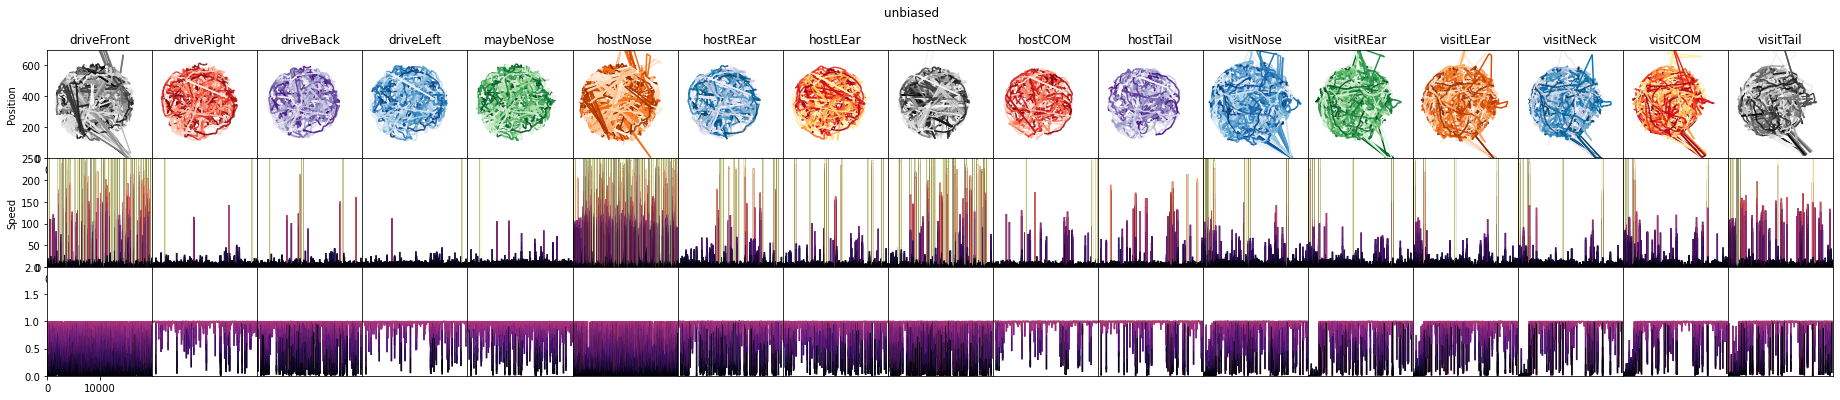

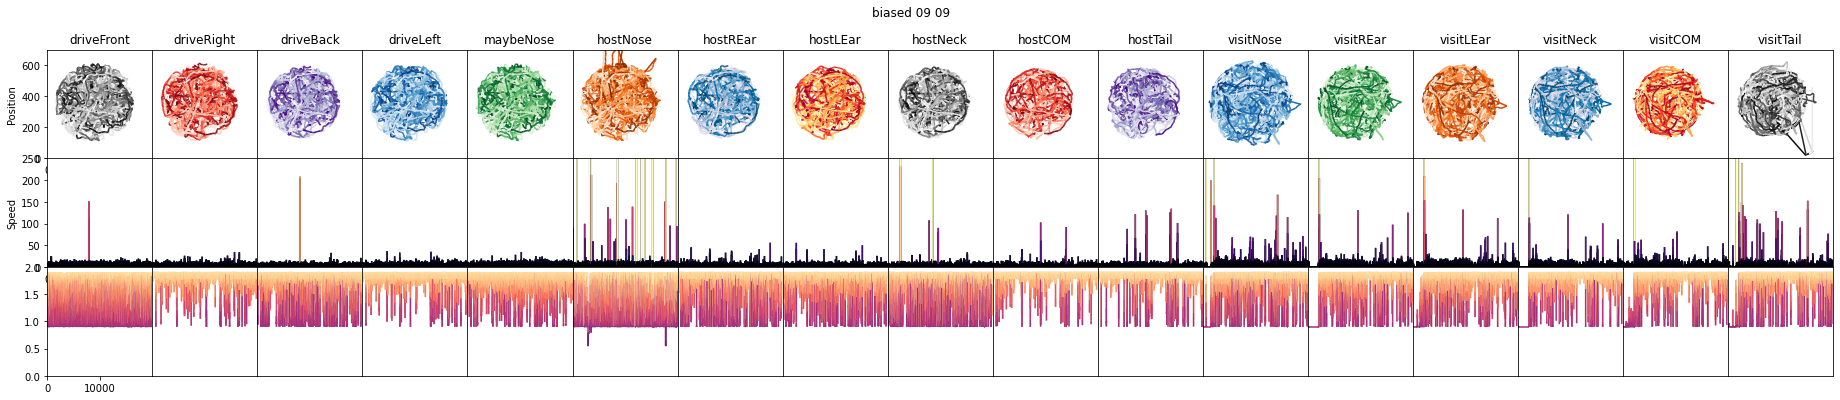

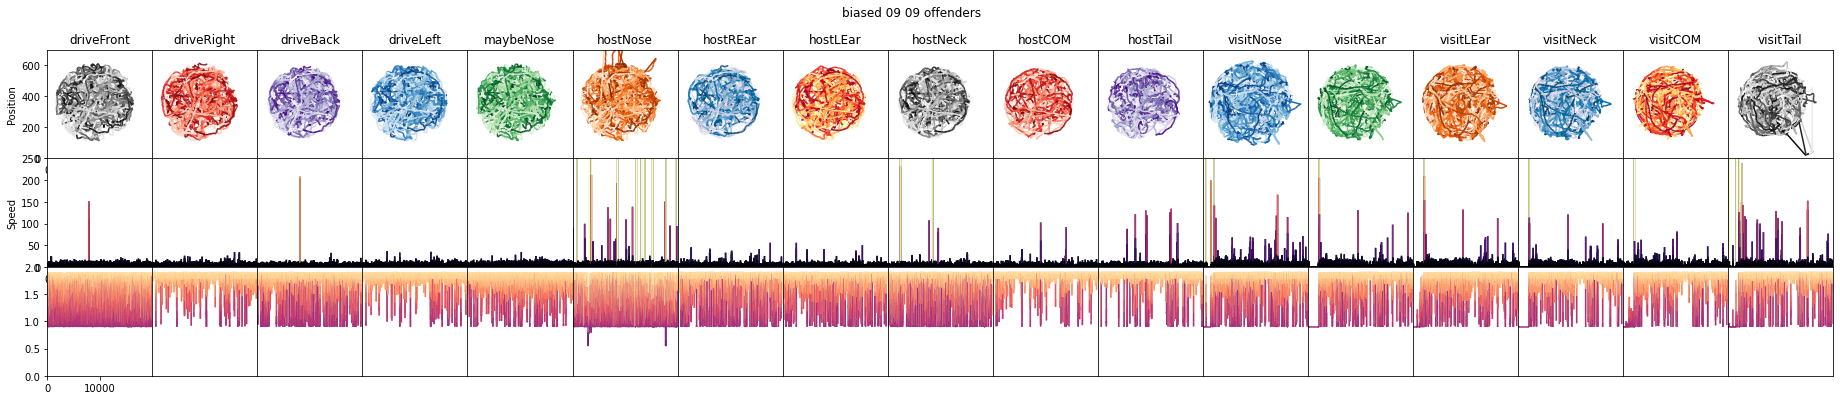

In [93]:
csp = bp  / 'full_no_bias'
res_r = load_csv(list(csp.glob('*.csv'))[0])
plot_traces(res_r, 32, 6, 'unbiased')

csp = bp / 'full_bias_09/'
res_m = load_csv(list(csp.glob('*.csv'))[0])
plot_traces(res_m, 32, 6, 'biased 09 09')

csp = bp / 'full_bias_09_offenders1/'
res = load_csv(list(csp.glob('*.csv'))[0])
plot_traces(res, 32, 6, 'biased 09 09 offenders')

0.5458775758743286

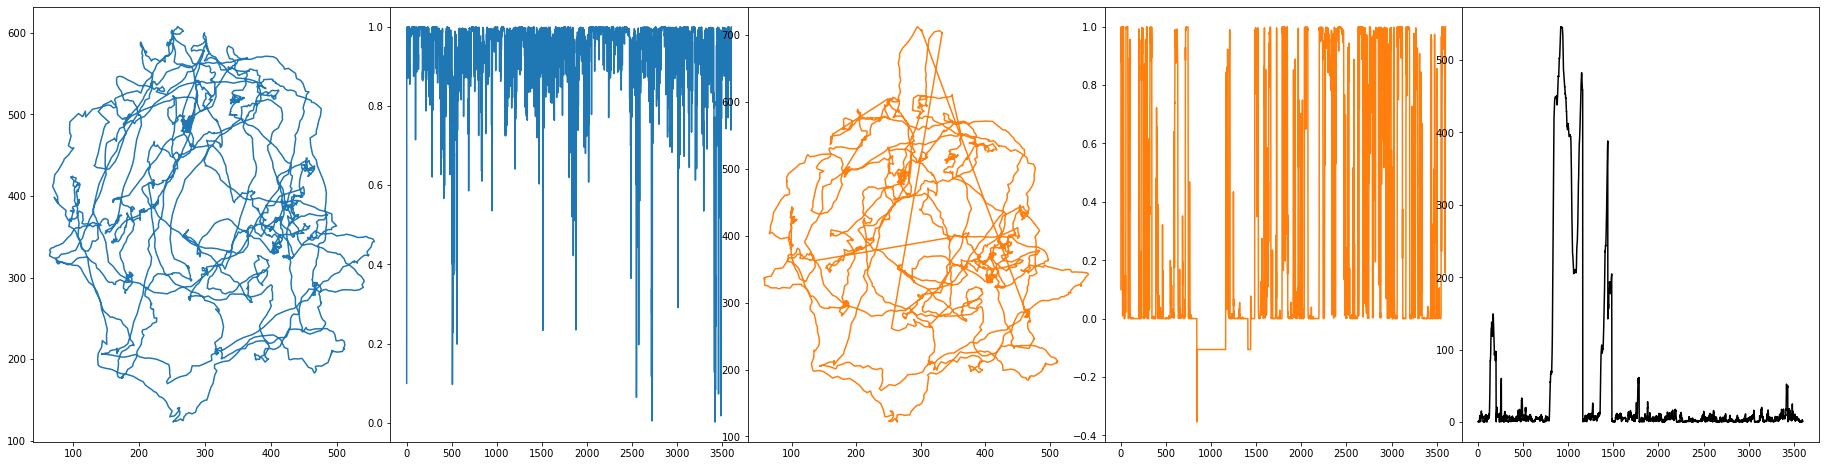

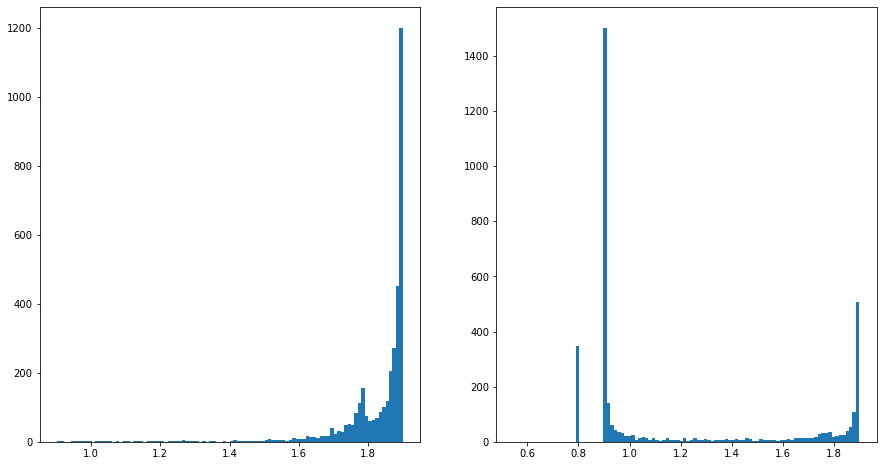

In [41]:
xm = np.array([r[1+4*3] for r in res[1:]])
ym = np.array([r[2+4*3] for r in res[1:]])
pm = np.array([r[3+4*3] for r in res[1:]])

xh = np.array([r[1+5*3] for r in res[1:]])
yh = np.array([r[2+5*3] for r in res[1:]])
ph = np.array([r[3+5*3] for r in res[1:]])

d = np.sqrt((xm-xh)**2+(ym-yh)**2)
fig, ax = plt.subplots(1, 5, figsize=(32, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
ax[0].plot(xm, ym, c="C0")
ax[1].set_title
ax[1].plot(pm-0.9, c="C0")
ax[2].plot(xh, yh, c="C1")
ax[3].plot(ph-0.9, c="C1")
ax[4].plot(d, c="black")

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].hist(pm, bins=100)
ax[1].hist(ph, bins=100);
min(ph)

0.038748741149902344

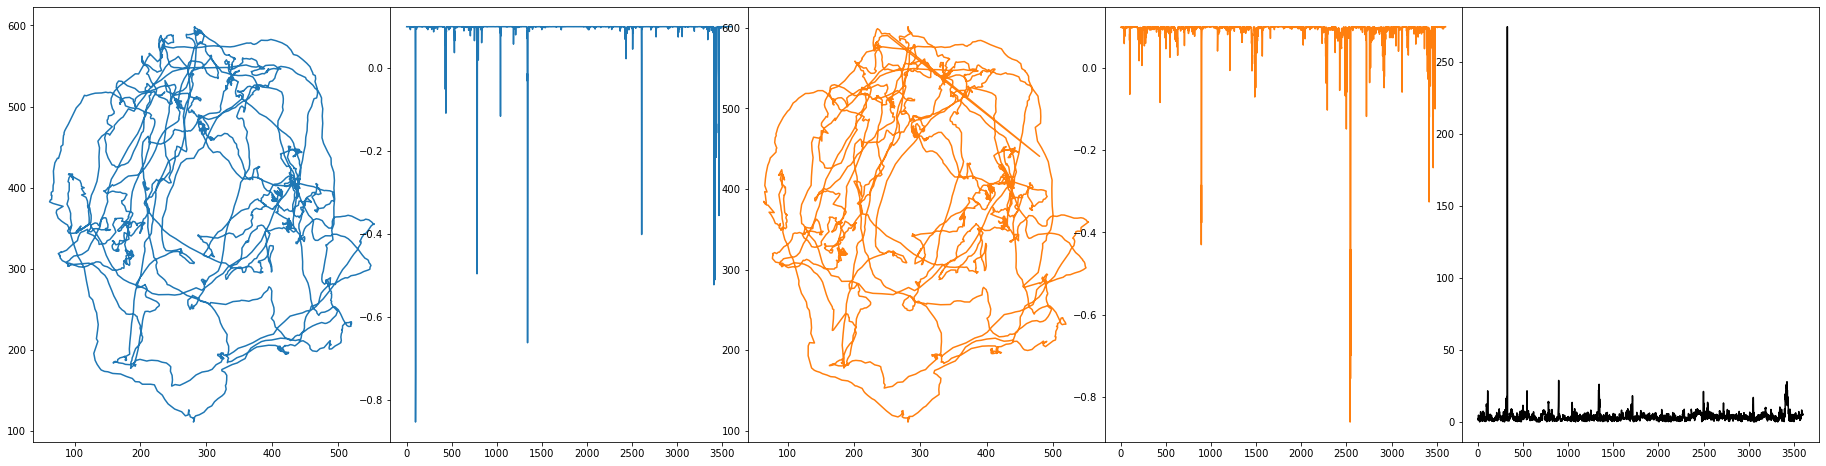

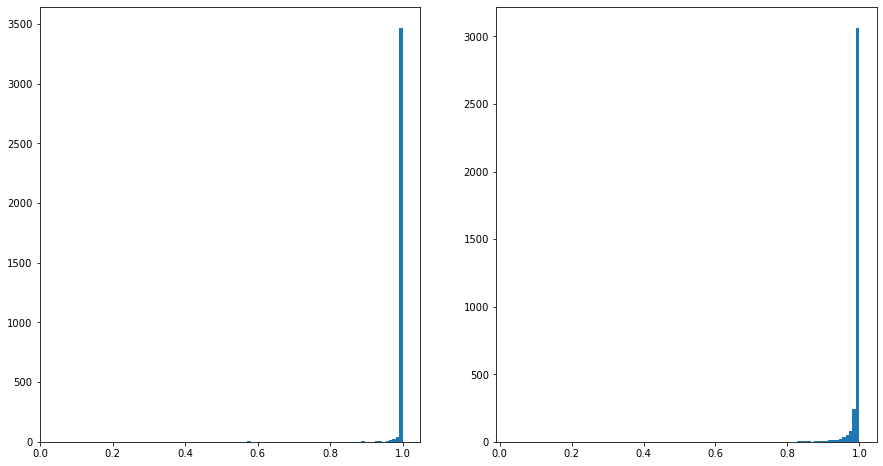

In [44]:
bpartid = 1
xm = np.array([r[1+bpartid*3] for r in res_m[1:]])
ym = np.array([r[2+bpartid*3] for r in res_m[1:]])
pm = np.array([r[3+bpartid*3] for r in res_m[1:]])

xh = np.array([r[1+bpartid*3] for r in res_r[1:]])
yh = np.array([r[2+bpartid*3] for r in res_r[1:]])
ph = np.array([r[3+bpartid*3] for r in res_r[1:]])

d = np.sqrt((xm-xh)**2+(ym-yh)**2)
fig, ax = plt.subplots(1, 5, figsize=(32, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
ax[0].plot(xm, ym, c="C0")
ax[1].set_title
ax[1].plot(pm-0.9, c="C0")
ax[2].plot(xh, yh, c="C1")
ax[3].plot(ph-0.9, c="C1")
ax[4].plot(d, c="black")

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].hist(pm, bins=100)
ax[1].hist(ph, bins=100);
min(ph)

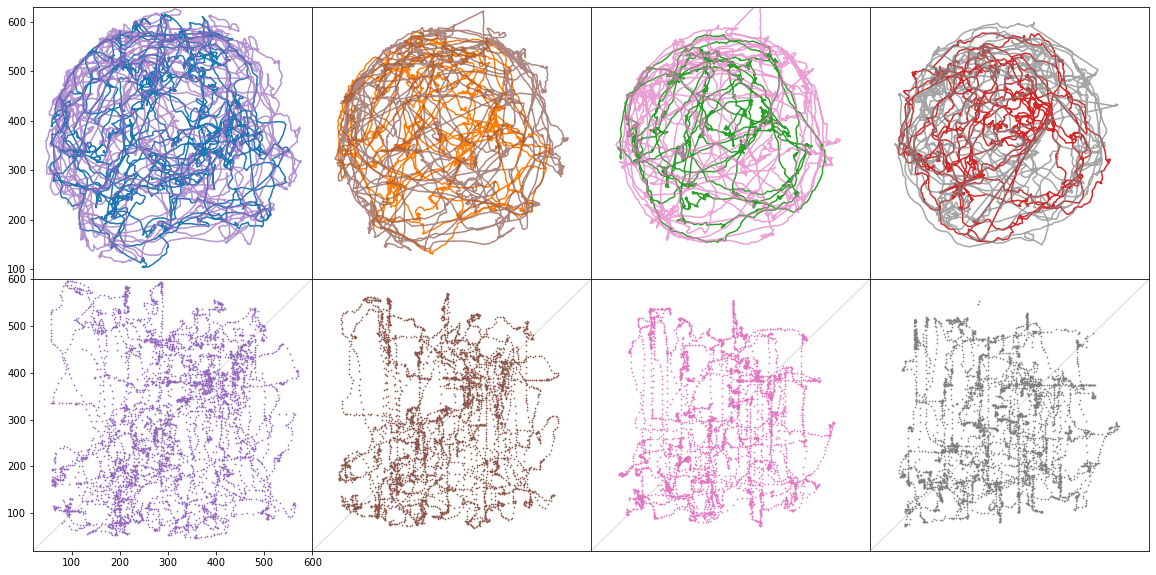

In [28]:
def offender_plot(res):
    fig, ax = plt.subplots(2, 4, figsize=(20, 10))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
    for n in range(4):
        x1 = [r[1+n*3] for r in res[1:]]
        y1 = [r[2+n*3] for r in res[1:]]
        ax[0, n].plot(x1, y1, color=f'C{n}')
        
        x2 = [r[1+(n+4)*3] for r in res[1:]]
        y2 = [r[2+(n+4)*3] for r in res[1:]]
        ax[0, n].plot(x2, y2, color=f'C{n+4}', alpha=0.7)
        
        ax[0, n].set_xlim(20, 620)
        ax[0, n].set_ylim(80, 630)
        if(n):
            ax[0, n].set_xticks([])
            ax[0, n].set_yticks([])
            
        diag = np.arange(700)
        ax[1, n].scatter(x1, x2, color=f'C{n+4}', s=0.5)
        ax[1, n].plot(diag, diag, color='k', alpha=0.1)
        ax[1, n].set_xlim(20, 600)
        ax[1, n].set_ylim(20, 600)
        if(n):
            ax[1, n].set_xticks([])
            ax[1, n].set_yticks([])
offender_plot(res)

In [20]:
n = 0
x = [r[1+n*3] for r in res[1:]]
y = [r[2+n*3] for r in res[1:]]
p = [r[3+n*3] for r in res[1:]]

In [102]:
df = pd.DataFrame(res_m)
new_names = ['frame'] + ['_'.join((bpn, cn)) for bpn in bodyparts for cn in colnames]
df.rename(columns=dict(zip(df.columns, new_names)), inplace=True)
df

,frame,driveFront_x,driveFront_y,driveFront_l,driveRight_x,driveRight_y,driveRight_l,driveBack_x,driveBack_y,driveBack_l,...,visitLEar_l,visitNeck_x,visitNeck_y,visitNeck_l,visitCOM_x,visitCOM_y,visitCOM_l,visitTail_x,visitTail_y,visitTail_l
0,0.0,384.354858,446.602081,0.031155,374.405334,421.195953,0.997665,393.200928,419.052643,0.998262,...,0.001370,396.446259,404.946869,0.001430,381.718353,448.050568,0.033378,376.285278,447.756897,0.000840
1,1.0,387.656891,448.079376,0.903660,376.847534,424.020874,1.893571,393.930969,419.821564,1.895818,...,0.900156,396.976379,404.723022,0.901897,385.240479,452.416626,0.900174,382.238098,450.749084,0.900011
2,2.0,389.602112,447.560883,0.902641,377.862793,426.016541,1.899323,395.446564,418.915649,1.898012,...,0.900012,396.730286,404.857697,0.902013,390.976624,449.308075,0.900074,385.605469,449.564148,0.900050
3,3.0,389.779602,446.920898,0.991944,378.529175,426.335999,1.898988,395.800537,418.165344,1.899211,...,0.900002,396.346680,405.854950,0.903548,394.085876,450.931152,0.900087,386.096222,447.448792,0.900034
4,4.0,388.616058,444.063751,1.432542,378.095856,425.535400,1.899044,395.337769,418.161621,1.899041,...,0.900000,395.918610,407.265686,0.907474,393.149689,450.693848,0.900014,386.216400,446.625885,0.900002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19871,19871.0,420.786987,490.063354,1.899181,419.161011,514.700195,1.898876,397.596771,509.906403,1.898659,...,1.897857,268.236969,354.802368,1.898360,236.363342,341.680359,1.898224,207.919357,353.104706,1.899552
19872,19872.0,421.697998,496.962555,1.888862,417.420502,522.727539,1.895356,400.205902,512.219849,1.842880,...,1.895195,268.897034,357.734497,1.898834,237.634888,342.572784,1.897341,207.309799,351.782440,1.898892
19873,19873.0,422.479156,497.983246,1.897039,419.651154,525.839661,1.898331,399.690460,516.781677,1.893262,...,1.898457,271.362000,361.793488,1.891729,238.463074,343.171722,1.849210,207.616989,351.112335,1.898628
19874,19874.0,422.939484,499.399414,1.894660,419.211731,525.738525,1.882797,399.427582,517.507446,1.885618,...,1.887997,274.570557,365.727448,1.897903,242.753082,345.603210,1.788791,208.415222,349.995026,1.896747


In [103]:
for bp in bodyparts:
    df[f'{bp}_speed'] = np.zeros_like(df[f'{bp}_x'])
    df[f'{bp}_speed'][1:] = np.linalg.norm(np.diff(df[[f'{bp}_x', f'{bp}_y']], axis=0), axis=1)

In [104]:
for bp in bodyparts:
    df[f'{bp}_jmp'] = df[f'{bp}_speed'] > 30

In [105]:
for bp in bodyparts:
    jmps = df[f'{bp}_jmp'].sum()
    print(f'{bp} jumps {jmps} times')

driveFront jumps 2 times
driveRight jumps 3 times
driveBack jumps 3 times
driveLeft jumps 3 times
maybeNose jumps 1 times
hostNose jumps 29 times
hostREar jumps 12 times
hostLEar jumps 9 times
hostNeck jumps 8 times
hostCOM jumps 8 times
hostTail jumps 17 times
visitNose jumps 40 times
visitREar jumps 18 times
visitLEar jumps 20 times
visitNeck jumps 19 times
visitCOM jumps 19 times
visitTail jumps 41 times


In [112]:
jumps = df[[f'{bp}_jmp' for bp in bodyparts]]

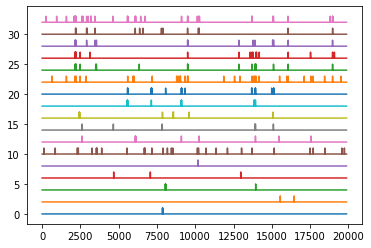

In [121]:
plt.plot(jumps+np.arange(len(bodyparts))*2);